# **Linear Regression**

In [1]:
import torch
from torch import nn

import matplotlib.pyplot as plt

# Device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

cpu


In [2]:
# Creat some dataset
weight = 0.7
bais = 0.3

start = 0
end = 1
step = 0.01

# Create data
X_regression = torch.arange(start, end, step).unsqueeze(dim=1)
y_regression = X_regression * weight + bais

# Check the data
print(X_regression[:5], y_regression[:5])

print(len(X_regression), len(y_regression))

# Creat the Train and Test split
train_split = int(0.8 * len(X_regression))
print(train_split)

X_train_reg, y_train_reg = X_regression[:train_split], y_regression[:train_split]
X_test_reg, y_test_reg =  X_regression[train_split:], y_regression[train_split:]

# Check the length of each
len(X_train_reg), len(X_test_reg), len(y_train_reg), len(y_test_reg)

tensor([[0.0000],
        [0.0100],
        [0.0200],
        [0.0300],
        [0.0400]]) tensor([[0.3000],
        [0.3070],
        [0.3140],
        [0.3210],
        [0.3280]])
100 100
80


(80, 20, 80, 20)

In [3]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if it's not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mohd-faizy/PyTorch-Essentials/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

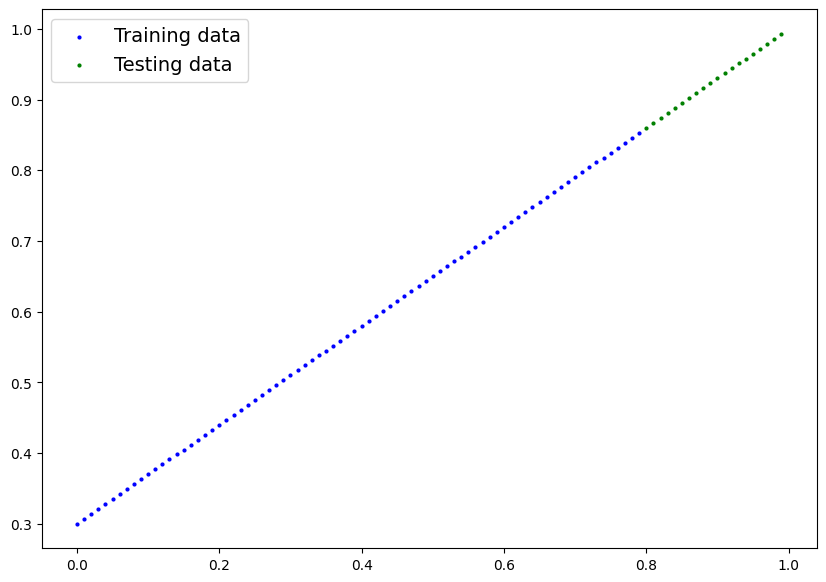

In [4]:
# Plot the Pre
plot_predictions(train_data=X_train_reg,
                 train_labels=y_train_reg,
                 test_data=X_test_reg,
                 test_labels=y_test_reg);

In [5]:
# Defining model to fit the string line
model = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1)
).to(device)

print(model)

# Loss and optimizer
loss_fn = nn.L1Loss() # MAE loss with regression data
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.01) #Try with lr=0.001

# accuracy - no accuracy_fn - regression  problem

# Train the model
torch.manual_seed(42)

# Set the number of epochs
epochs = 1000

# Put data to target device
X_train_reg, X_test_reg  = X_train_reg.to(device),X_test_reg.to(device)
y_train_reg, y_test_reg =  y_train_reg.to(device), y_test_reg.to(device)

for epoch in range(epochs):
    ### Training
    # 1. Forward pass
    y_pred = model(X_train_reg)

    # 2. Calculate loss (no accuracy since it's a regression problem, not classification)
    loss = loss_fn(y_pred, y_train_reg)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model.eval()
    with torch.inference_mode():
      # 1. Forward pass
      test_pred = model(X_test_reg)
      # 2. Calculate the loss
      test_loss = loss_fn(test_pred, y_test_reg)

    # Print out what's happening
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Train loss: {loss:.5f}, Test loss: {test_loss:.5f}")

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)
Epoch: 0 | Train loss: 0.35748, Test loss: 0.68668
Epoch: 100 | Train loss: 0.01972, Test loss: 0.04534
Epoch: 200 | Train loss: 0.02667, Test loss: 0.00271
Epoch: 300 | Train loss: 0.02447, Test loss: 0.00677
Epoch: 400 | Train loss: 0.02532, Test loss: 0.00646
Epoch: 500 | Train loss: 0.02393, Test loss: 0.00664
Epoch: 600 | Train loss: 0.02281, Test loss: 0.00569
Epoch: 700 | Train loss: 0.02192, Test loss: 0.00498
Epoch: 800 | Train loss: 0.02122, Test loss: 0.00607
Epoch: 900 | Train loss: 0.02067, Test loss: 0.00595


**NOTE**  

**Why we dont have accuracy metric for Linear Regression?**

> **linear regression** prioritizes minimizing prediction errors, while **classification** focuses on correctly classifying instances.


# Linear Regression

**Purpose:** Linear regression aims to model the relationship between a continuous dependent variable (target) and one or more independent variables (predictors).

**Evaluation Metric:** Linear regression does not use accuracy as an evaluation metric. Instead, it focuses on minimizing the mean squared error (MSE) or maximizing the coefficient of determination (R-squared).

- **MSE:** Measures the average squared difference between predicted and actual values.
- **R-squared:** Represents the proportion of variance in the target variable explained by the predictors.

**Reasons for No Accuracy:**
- The target variable is continuous, making it challenging to define a binary classification threshold for accuracy.
- Accuracy is not suitable because it doesn’t capture the magnitude of errors (e.g., predicting 10 when the actual value is 100 vs. predicting 90 when the actual value is 100).
- Linear regression focuses on minimizing the overall prediction error, not classifying correctly or incorrectly.

# Classification

**Purpose:** Classification deals with predicting a categorical outcome (e.g., class labels, yes/no, spam/not spam).

**Evaluation Metric:** Classification models use metrics like accuracy, precision, recall, F1-score, and area under the receiver operating characteristic curve (AUC-ROC).

- **Accuracy:** Measures the proportion of correctly classified instances.
- **Precision:** Focuses on correctly identifying positive instances (minimizing false positives).
- **Recall:** Emphasizes capturing all positive instances (minimizing false negatives).
- **F1-score:** Balances precision and recall.
- **AUC-ROC:** Measures the model’s ability to distinguish between positive and negative classes.

**Reasons for Accuracy:**
- In classification, we deal with discrete outcomes, making accuracy meaningful.
- The goal is to classify instances correctly into predefined categories.
- Accuracy provides a straightforward measure of model performance.


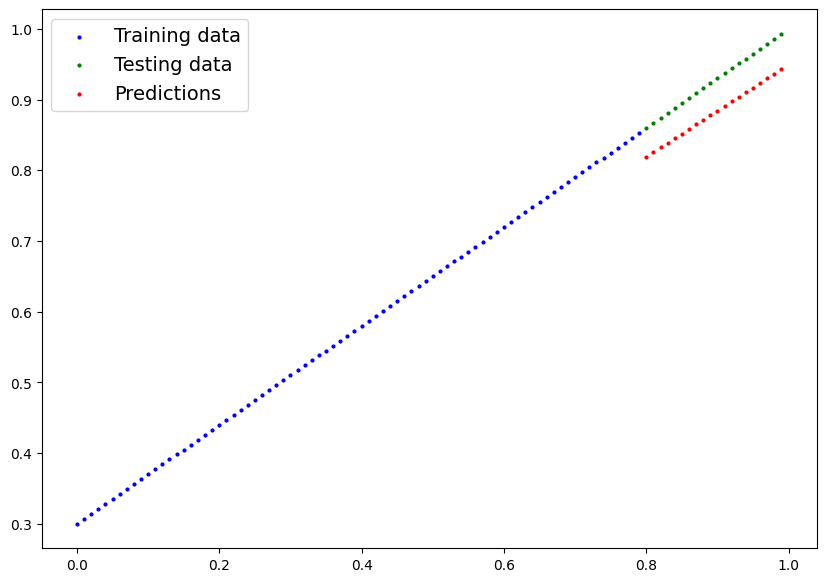

In [6]:
# Turn on evaluation mode
model.eval()

# Make predictions (inference)
with torch.inference_mode():
    y_preds = model(X_test_reg)

# Plot data and predictions with data on the CPU (matplotlib can't handle data on the GPU)
# (try removing .cpu() from one of the below and see what happens)
plot_predictions(train_data=X_train_reg.cpu(),
                 train_labels=y_train_reg.cpu(),
                 test_data=X_test_reg.cpu(),
                 test_labels=y_test_reg.cpu(),
                 predictions=y_preds.cpu());

## **Replicating non-linear activation functions**

**ReLU** $\rightarrow$ $$f(x) = max(0, x)$$


tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])


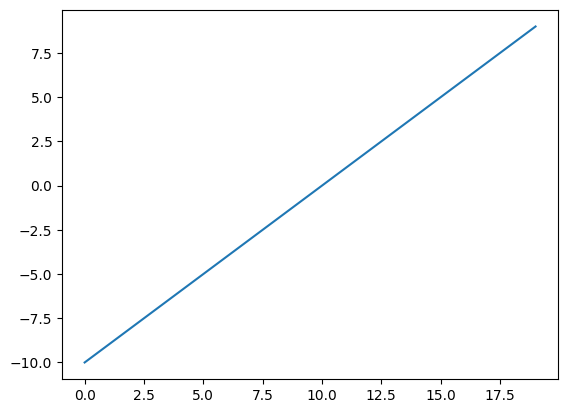

In [7]:
# Create a Tesnor
A = torch.arange(start=-10, end=10, step=1, dtype=torch.float32)
print(A)

# Visualize the toy tensor
plt.plot(A);

- So insted of using the PyTorch **ReLU** (`torch.nn.ReLU`), we'll recreate it ourself.
- The **ReLU** function turn all the negatives to zero and leaves the positive values as they are.

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])


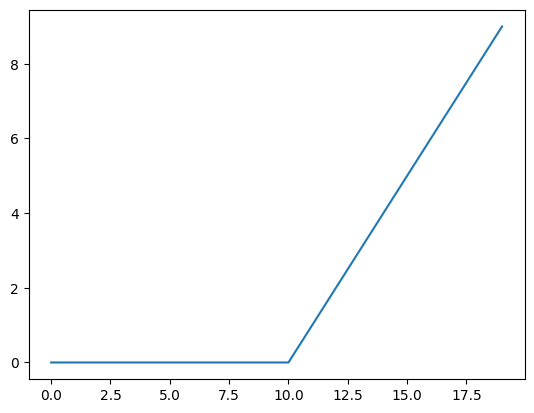

In [8]:
# Recreating the ReLU function
def relu_fn(x):
    return torch.maximum(torch.tensor(0), x)

# Pass the toy tensor through ReLU function
print(relu_fn(A))

# Plot ReLU activated toy tensor
plt.plot(relu_fn(A));

Sigmoid $\rightarrow$  $$S(x) = \frac{1}{1+e^{-x_i}}$$

tensor([4.5398e-05, 1.2339e-04, 3.3535e-04, 9.1105e-04, 2.4726e-03, 6.6929e-03,
        1.7986e-02, 4.7426e-02, 1.1920e-01, 2.6894e-01, 5.0000e-01, 7.3106e-01,
        8.8080e-01, 9.5257e-01, 9.8201e-01, 9.9331e-01, 9.9753e-01, 9.9909e-01,
        9.9966e-01, 9.9988e-01])


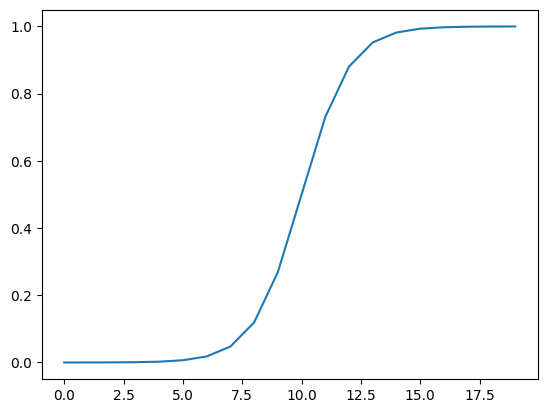

In [9]:
# Create a custom sigmoid function
def sigmoid(x):
  return 1 / (1 + torch.exp(-x))

# Test custom sigmoid on toy tensor
print(sigmoid(A))

# Plotting the Sigmoid Toy Tensor
plt.plot(sigmoid(A));